In [5]:
!git clone https://github.com/Kazuhito00/hand-gesture-recognition-using-mediapipe.git

Cloning into 'hand-gesture-recognition-using-mediapipe'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 182 (delta 59), reused 48 (delta 48), pack-reused 107 (from 1)
Receiving objects: 100% (182/182), 1.06 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [6]:
%cd hand-gesture-recognition-using-mediapipe

/content/hand-gesture-recognition-using-mediapipe


In [7]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Caminho do arquivo

In [16]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

Determinar quantidade de classes

In [9]:
NUM_CLASSES = 3

# Leitura do dataset


In [10]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [11]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Construção do Modelo

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,103 (4.31 KB)

 Trainable params: 1,103 (4.31 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [18]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



# Treinamento do modelo

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 1.1358
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3471 - loss: 1.1319 - val_accuracy: 0.4367 - val_loss: 1.0483
Epoch 2/1000
23/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3949 - loss: 1.0743 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3980 - loss: 1.0725 - val_accuracy: 0.4843 - val_loss: 1.0232
Epoch 3/1000
23/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4284 - loss: 1.0568 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4305 - loss: 1.0543 - val_accuracy: 0.6083 - val_loss: 0.9786
Epoch 4/1000
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4939 - loss: 1.0097 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [20]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9763 - loss: 0.1869 


In [21]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [22]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[0.6458551  0.31218532 0.04195954]
0




# Matriz de Confusão

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


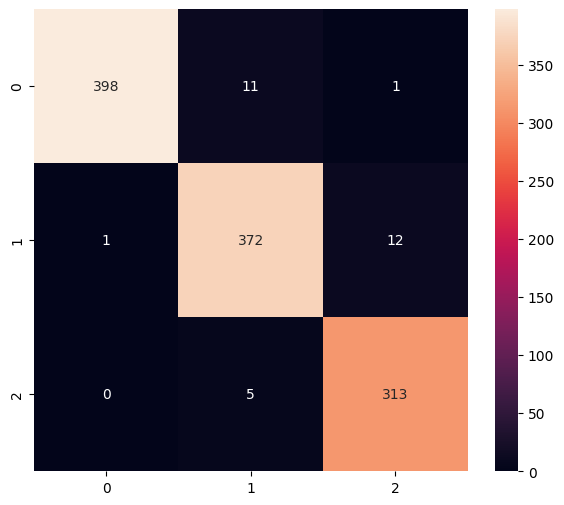

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       410
           1       0.96      0.97      0.96       385
           2       0.96      0.98      0.97       318

    accuracy                           0.97      1113
   macro avg       0.97      0.97      0.97      1113
weighted avg       0.97      0.97      0.97      1113



In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Converter resultados do modelo para TensorFlow Lite

In [24]:

model.save(model_save_path, include_optimizer=False)

In [25]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmp9hp372r0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  134437752721040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134437752733136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134437751948304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134437751948688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134437751947728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134437751948880: TensorSpec(shape=(), dtype=tf.resource, name=None)


6512

# Teste de inferência

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [27]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 214 µs, sys: 736 µs, total: 950 µs
Wall time: 851 µs


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.64585525 0.3121852  0.04195952]
0


In [31]:
from google.colab import files

# Download the TFLite model file
files.download(tflite_save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>